# Birds in Bexar County 2023

In [53]:
import pandas as pd
import numpy as np

import os

## acquire data

In [54]:
#read in the csv
df_init = pd.read_csv('data/ebd_US-TX-029_relDec-2023.txt', sep='\t')

/var/folders/14/ft4ch4ld42z46kvx0_wfd3d40000gp/T/ipykernel_40259/2576960814.py:2: DtypeWarning: Columns (11,12,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_init = pd.read_csv('data/ebd_US-TX-029_relDec-2023.txt', sep='\t')


In [55]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241487 entries, 0 to 2241486
Data columns (total 50 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   GLOBAL UNIQUE IDENTIFIER    object 
 1   LAST EDITED DATE            object 
 2   TAXONOMIC ORDER             int64  
 3   CATEGORY                    object 
 4   TAXON CONCEPT ID            object 
 5   COMMON NAME                 object 
 6   SCIENTIFIC NAME             object 
 7   SUBSPECIES COMMON NAME      object 
 8   SUBSPECIES SCIENTIFIC NAME  object 
 9   EXOTIC CODE                 object 
 10  OBSERVATION COUNT           object 
 11  BREEDING CODE               object 
 12  BREEDING CATEGORY           object 
 13  BEHAVIOR CODE               object 
 14  AGE/SEX                     object 
 15  COUNTRY                     object 
 16  COUNTRY CODE                object 
 17  STATE                       object 
 18  STATE CODE                  object 
 19  COUNTY               

In [56]:
#make it python friendly
df_init.columns = df_init.columns.str.lower().str.replace('\W+','_',regex=True)

In [57]:
df_init.head()

,global_unique_identifier,last_edited_date,taxonomic_order,category,taxon_concept_id,common_name,scientific_name,subspecies_common_name,subspecies_scientific_name,exotic_code,...,number_observers,all_species_reported,group_identifier,has_media,approved,reviewed,reason,trip_comments,species_comments,unnamed_49
0,URN:CornellLabOfOrnithology:EBIRD:OBS286909380,2014-12-25 10:06:03,33675,species,avibase-9FFEDE99,Black-throated Green Warbler,Setophaga virens,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Earliest date of spring arrival; Contributed b...,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS286909422,2014-12-28 03:15:21,33798,species,avibase-F2D675AF,Canada Warbler,Cardellina canadensis,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Earliest date of spring arrival; Contributed b...,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS286909607,2014-12-25 10:06:03,33454,species,avibase-183E5F90,Nashville Warbler,Leiothlypis ruficapilla,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Earliest date of spring arrival; Contributed b...,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS850036341,2020-01-11 17:26:53,27866,species,avibase-B01E8BD4,Hermit Thrush,Catharus guttatus,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Oberholser, Harry C., 1974. The Bird Life of T...",Specimen; H.P. Attwater,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS286909578,2014-12-25 10:06:03,33528,species,avibase-15EB3000,Hooded Warbler,Setophaga citrina,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Contributed by H.P. Attwater,NaN


In [58]:
df_init.shape

(2241487, 50)

## prepare

In [59]:
df_init.head()

,global_unique_identifier,last_edited_date,taxonomic_order,category,taxon_concept_id,common_name,scientific_name,subspecies_common_name,subspecies_scientific_name,exotic_code,...,number_observers,all_species_reported,group_identifier,has_media,approved,reviewed,reason,trip_comments,species_comments,unnamed_49
0,URN:CornellLabOfOrnithology:EBIRD:OBS286909380,2014-12-25 10:06:03,33675,species,avibase-9FFEDE99,Black-throated Green Warbler,Setophaga virens,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Earliest date of spring arrival; Contributed b...,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS286909422,2014-12-28 03:15:21,33798,species,avibase-F2D675AF,Canada Warbler,Cardellina canadensis,NaN,NaN,NaN,...,NaN,0,NaN,0,1,1,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Earliest date of spring arrival; Contributed b...,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS286909607,2014-12-25 10:06:03,33454,species,avibase-183E5F90,Nashville Warbler,Leiothlypis ruficapilla,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Earliest date of spring arrival; Contributed b...,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS850036341,2020-01-11 17:26:53,27866,species,avibase-B01E8BD4,Hermit Thrush,Catharus guttatus,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Oberholser, Harry C., 1974. The Bird Life of T...",Specimen; H.P. Attwater,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS286909578,2014-12-25 10:06:03,33528,species,avibase-15EB3000,Hooded Warbler,Setophaga citrina,NaN,NaN,NaN,...,NaN,0,NaN,0,1,0,NaN,"Chapman, F.M. 1907. The Warblers of North Amer...",Contributed by H.P. Attwater,NaN


#### drop all the columns not useful for this analysis

In [60]:
dft = df_init.drop(columns=['global_unique_identifier','last_edited_date','taxon_concept_id',
                                'scientific_name','subspecies_common_name','subspecies_scientific_name',
                                'exotic_code','breeding_code','breeding_category','behavior_code',
                                'age_sex','country','country_code','state_code','state','county',
                                'county_code','iba_code','bcr_code', 'locality_id', 'locality_type',
                                'protocol_code','protocol_type', 'project_code','effort_area_ha',
                                'has_media','approved','reviewed','reason','trip_comments',
                                'species_comments','unnamed_49','usfws_code','atlas_block',])

In [61]:
dft.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
0,33675,species,Black-throated Green Warbler,X,San Antonio,29.424129,-98.493591,1880-03-13,NaN,obsr553943,S21015194,NaN,NaN,NaN,0,NaN
1,33798,species,Canada Warbler,X,San Antonio,29.424129,-98.493591,1887-04-26,NaN,obsr553943,S21015234,NaN,NaN,NaN,0,NaN
2,33454,species,Nashville Warbler,X,San Antonio,29.424129,-98.493591,1889-03-21,NaN,obsr553943,S21015408,NaN,NaN,NaN,0,NaN
3,27866,species,Hermit Thrush,1,San Antonio,29.424129,-98.493591,1890-03-19,NaN,obsr1501291,S63287794,NaN,NaN,NaN,0,NaN
4,33528,species,Hooded Warbler,X,San Antonio,29.424129,-98.493591,1890-03-31,NaN,obsr553943,S21015381,NaN,NaN,NaN,0,NaN


#### change Xs to 1s, since that bird was seen at least once

In [62]:
dft.observation_count = np.where(dft.observation_count == 'X', 1, dft.observation_count)
dft.observation_count = dft.observation_count.astype(int)

In [63]:
dft.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
0,33675,species,Black-throated Green Warbler,1,San Antonio,29.424129,-98.493591,1880-03-13,NaN,obsr553943,S21015194,NaN,NaN,NaN,0,NaN
1,33798,species,Canada Warbler,1,San Antonio,29.424129,-98.493591,1887-04-26,NaN,obsr553943,S21015234,NaN,NaN,NaN,0,NaN
2,33454,species,Nashville Warbler,1,San Antonio,29.424129,-98.493591,1889-03-21,NaN,obsr553943,S21015408,NaN,NaN,NaN,0,NaN
3,27866,species,Hermit Thrush,1,San Antonio,29.424129,-98.493591,1890-03-19,NaN,obsr1501291,S63287794,NaN,NaN,NaN,0,NaN
4,33528,species,Hooded Warbler,1,San Antonio,29.424129,-98.493591,1890-03-31,NaN,obsr553943,S21015381,NaN,NaN,NaN,0,NaN


#### get rid of duplicate observations

when multiple people are birding together and they share a checklist, the birds on that list gets counted twice. this is annotated as the the group_identifier. i do not want those duplicate counts in this analysis. the highest observation count will be kept for these duplications.

In [64]:
#find all dupe checklists
#sort them by observation count
#drop the duplicates, except teh first instance
df_keep_dups = dft [dft.group_identifier.notnull()].sort_values('observation_count', 
                                               ascending=False).drop_duplicates(subset=['taxonomic_order',
                                                                                        'group_identifier'])
df_keep_dups.tail()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
1133689,1831,species,Pied-billed Grebe,1,Kearney Lake,29.308865,-98.696663,2018-12-16,09:29:00,obsr201422,S50738617,38.0,2.897,4.0,1,G3653904
1133672,1831,species,Pied-billed Grebe,1,"16142–16498 Interstate 35 S, Atascosa US-TX (2...",29.260123,-98.712126,2018-12-16,13:13:00,obsr116833,S50728689,186.0,32.257,3.0,1,G3655449
1133660,1831,species,Pied-billed Grebe,1,Mitchell Lake Audubon Center (HOTE 103),29.310596,-98.499694,2018-12-02,08:27:00,obsr841454,S50367824,151.0,9.479,2.0,1,G3622552
1133644,1831,species,Pied-billed Grebe,1,Woodlawn Lake (HOTE 093),29.450321,-98.532880,2018-12-30,10:30:00,obsr248865,S51092205,30.0,NaN,2.0,1,G3696268
1133641,1831,species,Pied-billed Grebe,1,Von Ormy--Pilot Travel Center pond,29.281264,-98.670069,2018-12-16,14:55:00,obsr926392,S50743835,17.0,0.438,3.0,1,G3658557


In [65]:
df_keep_dups.shape

(256615, 16)

In [66]:
#remove all duplicate checklists completely
df_no_dups = dft [dft.group_identifier.isnull()]
df_no_dups.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
0,33675,species,Black-throated Green Warbler,1,San Antonio,29.424129,-98.493591,1880-03-13,NaN,obsr553943,S21015194,NaN,NaN,NaN,0,NaN
1,33798,species,Canada Warbler,1,San Antonio,29.424129,-98.493591,1887-04-26,NaN,obsr553943,S21015234,NaN,NaN,NaN,0,NaN
2,33454,species,Nashville Warbler,1,San Antonio,29.424129,-98.493591,1889-03-21,NaN,obsr553943,S21015408,NaN,NaN,NaN,0,NaN
3,27866,species,Hermit Thrush,1,San Antonio,29.424129,-98.493591,1890-03-19,NaN,obsr1501291,S63287794,NaN,NaN,NaN,0,NaN
4,33528,species,Hooded Warbler,1,San Antonio,29.424129,-98.493591,1890-03-31,NaN,obsr553943,S21015381,NaN,NaN,NaN,0,NaN


In [67]:
df_no_dups.shape

(1571696, 16)

In [68]:
#combine the no dups df with the first dups only df
df = pd.concat([df_no_dups, df_keep_dups])

#drop group identifier column, as its no longer needed
df = df.drop('group_identifier', axis=1)

df.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported
0,33675,species,Black-throated Green Warbler,1,San Antonio,29.424129,-98.493591,1880-03-13,NaN,obsr553943,S21015194,NaN,NaN,NaN,0
1,33798,species,Canada Warbler,1,San Antonio,29.424129,-98.493591,1887-04-26,NaN,obsr553943,S21015234,NaN,NaN,NaN,0
2,33454,species,Nashville Warbler,1,San Antonio,29.424129,-98.493591,1889-03-21,NaN,obsr553943,S21015408,NaN,NaN,NaN,0
3,27866,species,Hermit Thrush,1,San Antonio,29.424129,-98.493591,1890-03-19,NaN,obsr1501291,S63287794,NaN,NaN,NaN,0
4,33528,species,Hooded Warbler,1,San Antonio,29.424129,-98.493591,1890-03-31,NaN,obsr553943,S21015381,NaN,NaN,NaN,0


#### keep data from 2002 and on
this is when ebird launched

In [84]:
df = df [df.observation_date >= '2002-01-01']

In [87]:
df.observation_date.sort_values()

63795      2002-01-01
64090      2002-01-01
63819      2002-01-01
63497      2002-01-01
64096      2002-01-01
              ...    
2229132    2023-12-31
2221237    2023-12-31
2229187    2023-12-31
2228950    2023-12-31
2223731    2023-12-31
Name: observation_date, Length: 1765735, dtype: object

#### export for tableau

In [88]:
df.to_csv('bexar_all.csv')

In [89]:
df.shape

(1765735, 15)

# State of Bexar Bird/ers in 2023

In [70]:
df.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported
0,33675,species,Black-throated Green Warbler,1,San Antonio,29.424129,-98.493591,1880-03-13,NaN,obsr553943,S21015194,NaN,NaN,NaN,0
1,33798,species,Canada Warbler,1,San Antonio,29.424129,-98.493591,1887-04-26,NaN,obsr553943,S21015234,NaN,NaN,NaN,0
2,33454,species,Nashville Warbler,1,San Antonio,29.424129,-98.493591,1889-03-21,NaN,obsr553943,S21015408,NaN,NaN,NaN,0
3,27866,species,Hermit Thrush,1,San Antonio,29.424129,-98.493591,1890-03-19,NaN,obsr1501291,S63287794,NaN,NaN,NaN,0
4,33528,species,Hooded Warbler,1,San Antonio,29.424129,-98.493591,1890-03-31,NaN,obsr553943,S21015381,NaN,NaN,NaN,0


### number of species seen

In [115]:
df.taxonomic_order.nunique()

492

> this value includes hybrids and unknowns

In [116]:
df [df.category == 'species'].taxonomic_order.nunique()

339

> there were 339 different species observered

### bird watching places

In [117]:
df.locality.nunique()

3347

> there were 3347 different places logged for birdwatching

the following sites are the top ten hotspots based on species seen:

        1	Mitchell Lake Audubon Center (HOTE 103)	353
        2	Braunig Lake (HOTE 101)	277
        3	Brackenridge Park (Avenue A & River Rd.)	269
        4	Crescent Bend Nature Park (Bexar Co.)	268
        5	Calaveras Lake (HOTE 100)	266
        6	San Antonio Botanical Garden (HOTE 096)	255
        7	Medina River Natural Area (HOTE 104)	242
        8	Live Oak City Park	240
        9	South Side Lions Park (HOTE 099)	229
        10	Bexar Co.--S. Evans Rd Lake	228
        
how does that compare to where birders actually went?

In [118]:
df[['sampling_event_identifier','locality']].drop_duplicates().locality.value_counts().head(15)

Mitchell Lake Audubon Center (HOTE 103)                           1394
Crescent Bend Nature Park (Bexar Co.)                              920
San Antonio Botanical Garden (HOTE 096)                            591
Home-Las Cimas: balcony                                            411
Brackenridge Park (Avenue A & River Rd.)                           346
Home                                                               304
209 Winged Teal                                                    302
Wiltshire Yard                                                     299
Government Canyon SNA (HOTE 085)                                   277
Honeydew Ridge, San Antonio US-TX 29.47995, -98.75086              240
Backyard                                                           194
Brackenridge Park (HOTE 095)                                       192
Braunig Lake (HOTE 101)                                            187
Woodlawn Lake (HOTE 093)                                           180
Leon C

In [119]:
df[['sampling_event_identifier','locality']].drop_duplicates().locality.str.contains('Braunig').sum()

197

> both Braunig Lake and Calaveras Lake appear to be an underutilized site for birdwatching

### popular birding days

In [120]:
df.observation_date.nunique()

365

>there was at least one list submitted every single day

In [121]:
df.groupby(['observation_date']).sampling_event_identifier.nunique().sort_values(ascending=False).head(5)

observation_date
2023-12-16    233
2023-02-19    203
2023-12-17    184
2023-02-18    170
2023-04-22    165
Name: sampling_event_identifier, dtype: int64

> december 16 and 17 were christmas count days! and the most popular bird days!

> were february 18 and 19 also counting days?

In [122]:
df.groupby(['observation_date']).sampling_event_identifier.nunique().sort_values(ascending=False).tail(5)

observation_date
2023-06-27    17
2023-08-03    16
2023-06-29    15
2023-08-02    15
2023-07-10    13
Name: sampling_event_identifier, dtype: int64

> on july 10, 2023, only 13 ebird lists were submitted

### time of day

In [123]:
df.time_observations_started.str[:2].value_counts().sort_index()

00       74
01        7
02       27
03       11
04       43
05      168
06     4795
07    42720
08    57601
09    35850
10    21339
11    17478
12    14457
13    13030
14    10839
15     8903
16     8865
17     8067
18     5078
19     3183
20      886
21      136
22       81
23       57
Name: time_observations_started, dtype: int64

> 8 am is the most popular start time

> why are people starting lists during nighttime hours?

### birders

In [124]:
df.observer_id.nunique()

2028

> there were 2028 birders in 2023

#### how many lists each birder submitted

In [125]:
obvs_ls = df.groupby(['observer_id']).sampling_event_identifier.nunique()
obvs_ls

observer_id
obsr1000095     4
obsr1000873     5
obsr100089     16
obsr1001058     1
obsr1002059    14
               ..
obsr996571      5
obsr997493      4
obsr998330      1
obsr999292      5
obsr999479      1
Name: sampling_event_identifier, Length: 2028, dtype: int64

In [126]:
obvs_ls [obvs_ls == 1 ].count()

799

In [127]:
799/2028

0.39398422090729784

> 39% of birders only submitted 1 list

In [128]:
round(obvs_ls.mean(),1)

9.6

> birders submitted an average of 9.6 checklists

<Axes: >

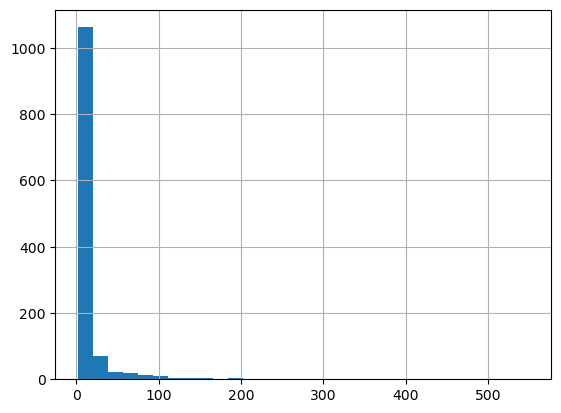

In [129]:
obvs_ls [obvs_ls > 1].hist(bins=30)

In [130]:
obvs_ls [obvs_ls > 100].nunique()

34

> only 34 birders submitted over 100 checklists

### checklists

In [131]:
df.sampling_event_identifier.nunique()

19427

> 19,427 ebird lists were submitted

In [132]:
df [df.all_species_reported == 1].sampling_event_identifier.nunique()

14806

In [133]:
14806/19427

0.7621351726977917

> 76% of those lists were complete lists

In [134]:
# df.to_csv('condensed_bexar2023.csv')

# part 2 - Visualize things 

In [135]:
df.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,07:30:00,obsr3537385,S125972869,180.0,3.219,1.0,1,NaN
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,08:50:00,obsr1483904,S125181190,74.0,1.724,2.0,1,NaN
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,15:30:00,obsr2096377,S126262342,NaN,NaN,1.0,0,NaN
3,21168,species,American Crow,2,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-21,08:03:00,obsr3073010,S126645616,108.0,1.650,13.0,1,G9532004
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,08:00:00,obsr59645,S126554160,180.0,32.187,1.0,1,NaN


In [136]:
# dfviz = df.drop(columns=['observer_id','duration_minutes','effort_distance_km',
#                       'number_observers','sampling_event_identifier','time_observations_started',
#                       'all_species_reported','trip_comments','species_comments'])

In [137]:
# dfviz.head()

#### only keep the known species category

In [138]:
# dfviz.category.value_counts()

In [139]:
# dfviz = dfviz [dfviz.category == 'species']

In [140]:
# dfviz = dfviz.drop(columns='category')

In [141]:
# dfviz.head()

In [142]:
# dfviz.shape

#### get rid of duplicate observations

#### get rid of duplicate observations

when multiple people are birding together and they see the same bird, that bird gets counted twice. this is annotated as the the group_identifier. i do not want those duplicate counts in this analysis. the highest observation count will be kept for these duplications.

In [143]:
#find all dupe checklists
#sort them by observation count
#drop the duplicates, except teh first instance
df_keep_dups = df [df.group_identifier.notnull()].sort_values('observation_count', 
                                               ascending=False).drop_duplicates(subset=['taxonomic_order',
                                                                                        'group_identifier'])
df_keep_dups.tail()

df_keep_dups.shape

#remove all duplicate checklists completely
df_no_dups = df [df.group_identifier.isnull()]
df_no_dups.head()

df_no_dups.shape

#combine the no dups df with the first dups only df
dff = pd.concat([df_no_dups, df_keep_dups])

dff.head()

dff = dff.drop('group_identifier', axis=1)

dff.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
80712,26669,species,Blue-gray Gnatcatcher,1,Friedrich Wilderness Pk (HOTE 086),29.640676,-98.626097,2023-04-27,15:06:00,obsr1101317,S136399073,84.0,1.856,8.0,1,G10089343
80593,26669,species,Blue-gray Gnatcatcher,1,Home-Las Cimas: balcony,29.514840,-98.573279,2023-04-14,08:21:00,obsr338409,S133718793,216.0,NaN,2.0,0,G9995324
80465,26669,species,Blue-gray Gnatcatcher,1,Salado Creek Greenway--Willow Springs Trailhead,29.425193,-98.434217,2023-04-17,18:47:00,obsr343993,S134774097,85.0,3.982,2.0,1,G10058331
179971,26669,species,Blue-gray Gnatcatcher,1,"Honeydew Ridge, San Antonio US-TX 29.47995, -9...",29.479952,-98.750862,2023-09-18,07:34:00,obsr217220,S150207178,80.0,NaN,2.0,1,G10859454
179883,26669,species,Blue-gray Gnatcatcher,1,"Honeydew Ridge, San Antonio US-TX 29.47995, -9...",29.479952,-98.750862,2023-09-24,07:29:00,obsr288302,S150721863,59.0,NaN,2.0,1,G10891207


In [144]:
df_keep_dups.shape

(30021, 16)

In [145]:
#remove all duplicate checklists completely
df_no_dups = df [df.group_identifier.isnull()]
df_no_dups.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,07:30:00,obsr3537385,S125972869,180.0,3.219,1.0,1,NaN
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,08:50:00,obsr1483904,S125181190,74.0,1.724,2.0,1,NaN
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,15:30:00,obsr2096377,S126262342,NaN,NaN,1.0,0,NaN
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,08:00:00,obsr59645,S126554160,180.0,32.187,1.0,1,NaN
5,21168,species,American Crow,1,Salado Creek Greenway--Jack White Park,29.452304,-98.423899,2023-01-18,08:15:00,obsr1018452,S126419345,15.0,0.676,1.0,1,NaN


In [146]:
df_no_dups.shape

(177059, 16)

In [147]:
#combine the no dups df with the first dups only df
dff = pd.concat([df_no_dups, df_keep_dups])

In [148]:
dff.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,07:30:00,obsr3537385,S125972869,180.0,3.219,1.0,1,NaN
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,08:50:00,obsr1483904,S125181190,74.0,1.724,2.0,1,NaN
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,15:30:00,obsr2096377,S126262342,NaN,NaN,1.0,0,NaN
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,08:00:00,obsr59645,S126554160,180.0,32.187,1.0,1,NaN
5,21168,species,American Crow,1,Salado Creek Greenway--Jack White Park,29.452304,-98.423899,2023-01-18,08:15:00,obsr1018452,S126419345,15.0,0.676,1.0,1,NaN


#### group identifier is no longer needed since dups have been removed

In [149]:
dff = dff.drop('group_identifier', axis=1)

In [150]:
dff.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,07:30:00,obsr3537385,S125972869,180.0,3.219,1.0,1
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,08:50:00,obsr1483904,S125181190,74.0,1.724,2.0,1
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,15:30:00,obsr2096377,S126262342,NaN,NaN,1.0,0
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,08:00:00,obsr59645,S126554160,180.0,32.187,1.0,1
5,21168,species,American Crow,1,Salado Creek Greenway--Jack White Park,29.452304,-98.423899,2023-01-18,08:15:00,obsr1018452,S126419345,15.0,0.676,1.0,1


## visual the data

plotly?

In [152]:
df.observation_date.sort_values()

3021      2023-01-01
8250      2023-01-01
20352     2023-01-01
22867     2023-01-01
20357     2023-01-01
             ...    
244266    2023-12-31
243587    2023-12-31
245405    2023-12-31
234579    2023-12-31
253184    2023-12-31
Name: observation_date, Length: 254085, dtype: object